In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [10]:
# Load dataset
file_path = r"C:\Users\HP\OneDrive\Desktop\3rd sem project\project_final_dataset.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [12]:
# Select relevant features
df = df[['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)', 'NITRATENAN N+ NITRITENANN (mg/l)']]

# Fill missing values
df.fillna(df.mean(), inplace=True)

# Normalize data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Apply KMeans clustering to estimate bacterial contamination
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Contamination_Level_KMeans'] = kmeans.fit_predict(df_scaled)

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df_scaled['Contamination_Score_IF'] = iso_forest.fit_predict(df_scaled)


C:\Users\HP\AppData\Local\Temp\ipykernel_19284\1169246386.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


In [13]:
# Use PCA for visualization
pca = PCA(n_components=2)
df_scaled[['PCA1', 'PCA2']] = pca.fit_transform(df_scaled.drop(columns=['Contamination_Level_KMeans', 'Contamination_Score_IF']))


In [14]:
# Save results to CSV
df_scaled.to_csv("contamination_predictions_done.csv", index=False)


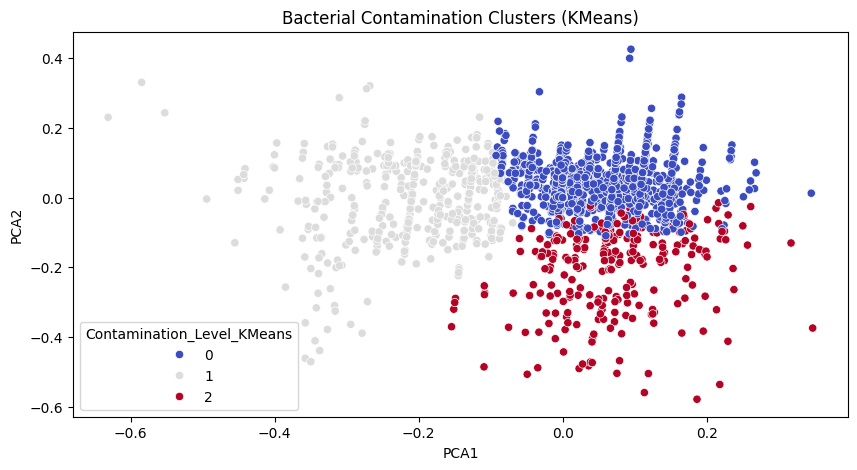

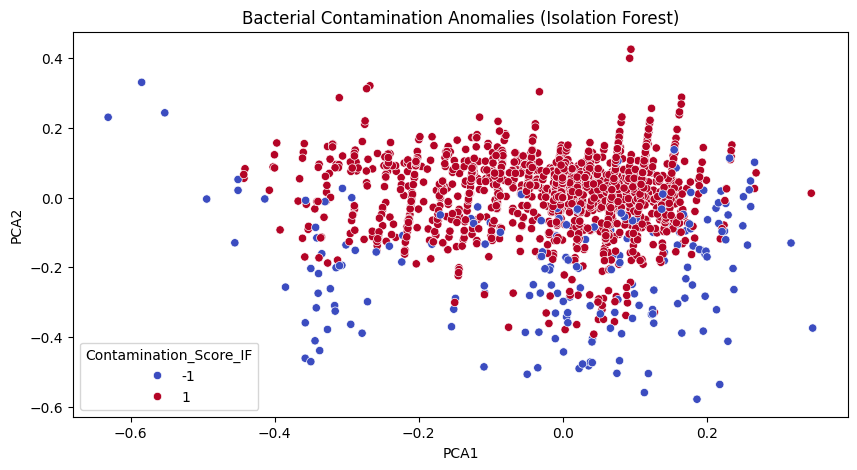

In [15]:
# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Contamination_Level_KMeans', palette='coolwarm', data=df_scaled)
plt.title("Bacterial Contamination Clusters (KMeans)")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Contamination_Score_IF', palette='coolwarm', data=df_scaled)
plt.title("Bacterial Contamination Anomalies (Isolation Forest)")
plt.show()

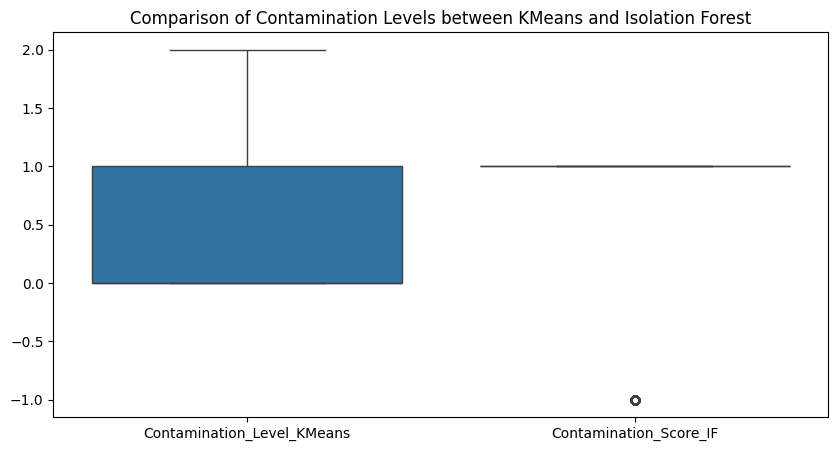

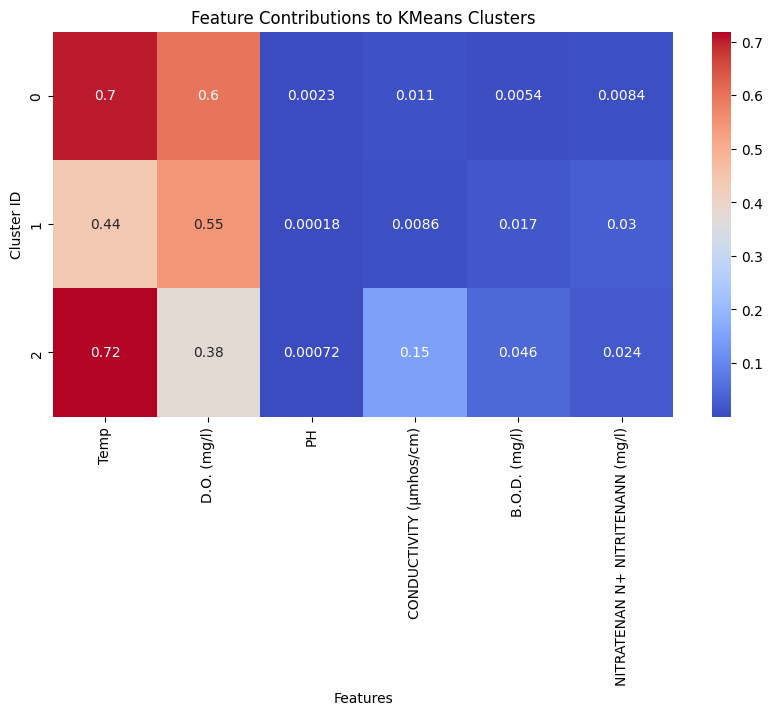

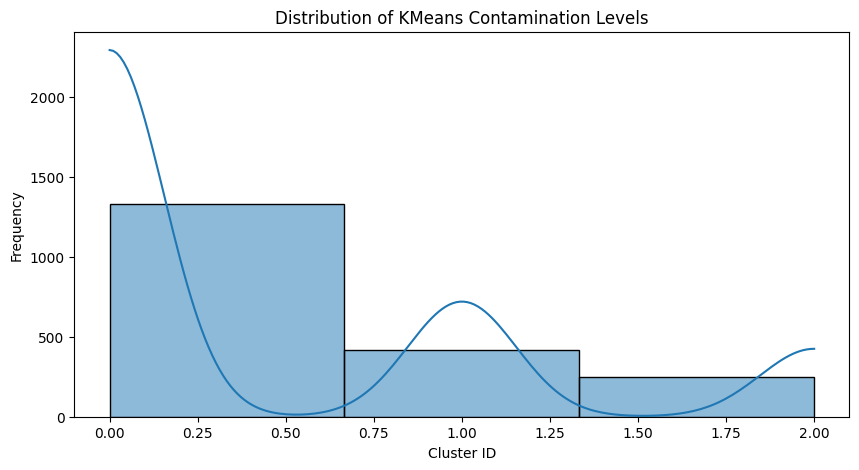

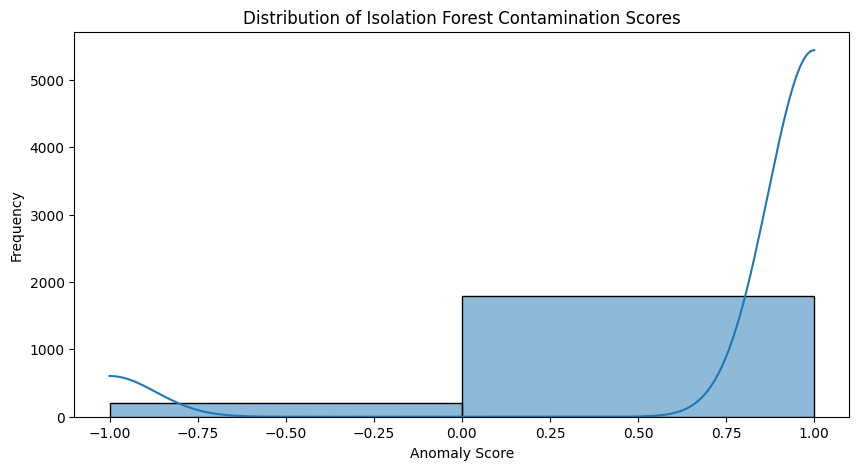

In [16]:
# Additional Comparisons
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_scaled[['Contamination_Level_KMeans', 'Contamination_Score_IF']])
plt.title("Comparison of Contamination Levels between KMeans and Isolation Forest")
plt.show()

# Feature importance visualization using KMeans cluster centers
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(kmeans.cluster_centers_, columns=df.columns), annot=True, cmap='coolwarm')
plt.title("Feature Contributions to KMeans Clusters")
plt.xlabel("Features")
plt.ylabel("Cluster ID")
plt.show()

# Distribution of Contamination Levels
plt.figure(figsize=(10, 5))
sns.histplot(df_scaled['Contamination_Level_KMeans'], bins=3, kde=True)
plt.title("Distribution of KMeans Contamination Levels")
plt.xlabel("Cluster ID")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_scaled['Contamination_Score_IF'], bins=2, kde=True)
plt.title("Distribution of Isolation Forest Contamination Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()


In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [21]:
# Apply KMeans clustering to estimate bacterial contamination
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df_scaled['Contamination_Level_KMeans'] = kmeans_labels

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_labels = iso_forest.fit_predict(df_scaled.drop(columns=['Contamination_Level_KMeans']))
df_scaled['Contamination_Score_IF'] = isolation_labels

# Compute Evaluation Metrics
silhouette_kmeans = silhouette_score(df_scaled.drop(columns=['Contamination_Level_KMeans', 'Contamination_Score_IF', 'PCA1', 'PCA2']), kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(df_scaled.drop(columns=['Contamination_Level_KMeans', 'Contamination_Score_IF', 'PCA1', 'PCA2']), kmeans_labels)

print(f"Silhouette Score for KMeans: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index for KMeans: {davies_bouldin_kmeans:.4f}")


Silhouette Score for KMeans: 0.3780
Davies-Bouldin Index for KMeans: 2.2089


In [23]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
df_scaled['Contamination_Level_DBSCAN'] = dbscan_labels

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(df_scaled)
df_scaled['Contamination_Level_Agglo'] = agglo_labels


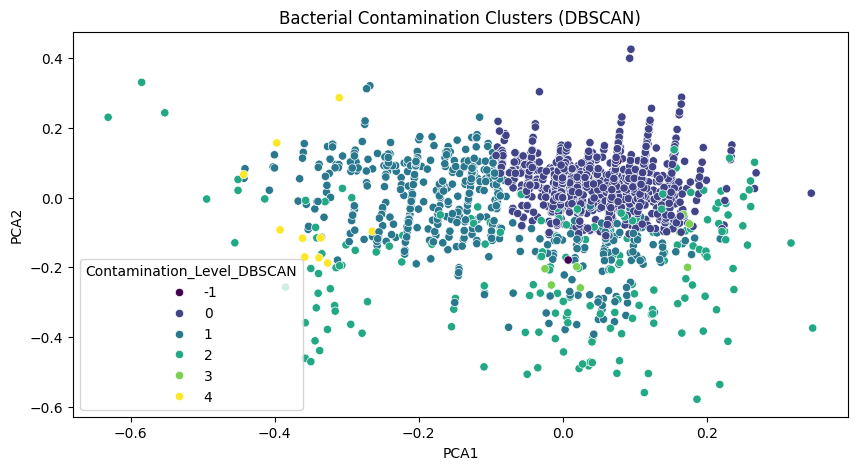

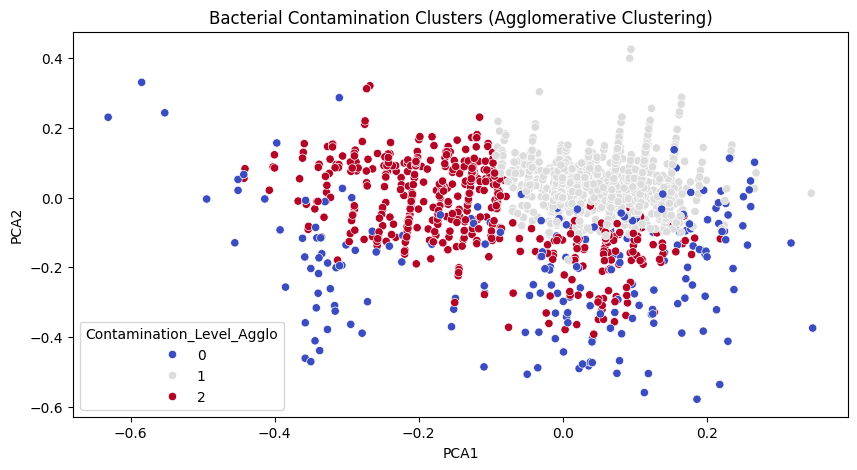

In [24]:
# Visualization - DBSCAN Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Contamination_Level_DBSCAN', palette='viridis', data=df_scaled)
plt.title("Bacterial Contamination Clusters (DBSCAN)")
plt.show()

# Visualization - Agglomerative Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Contamination_Level_Agglo', palette='coolwarm', data=df_scaled)
plt.title("Bacterial Contamination Clusters (Agglomerative Clustering)")
plt.show()

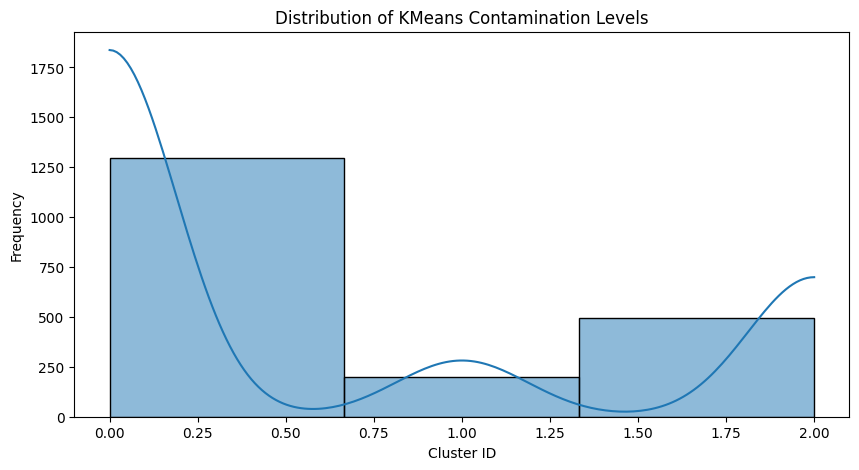

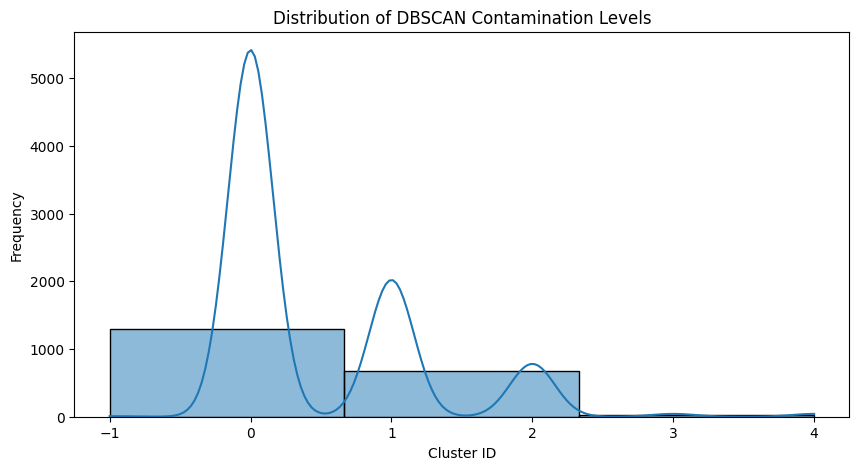

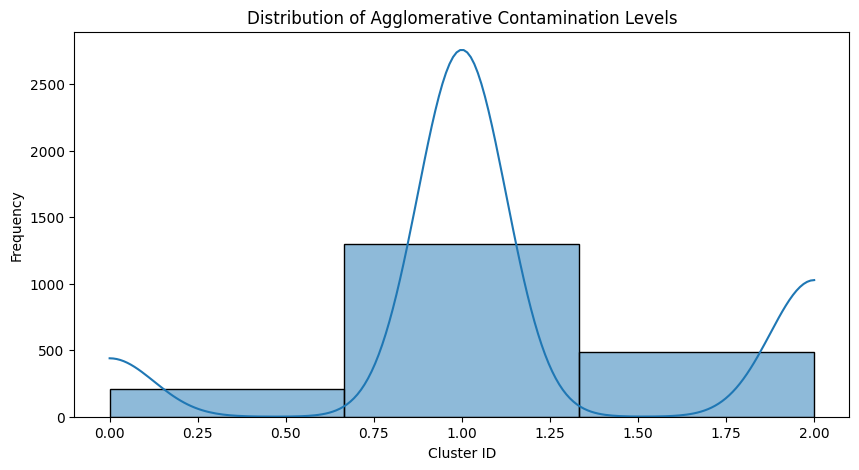

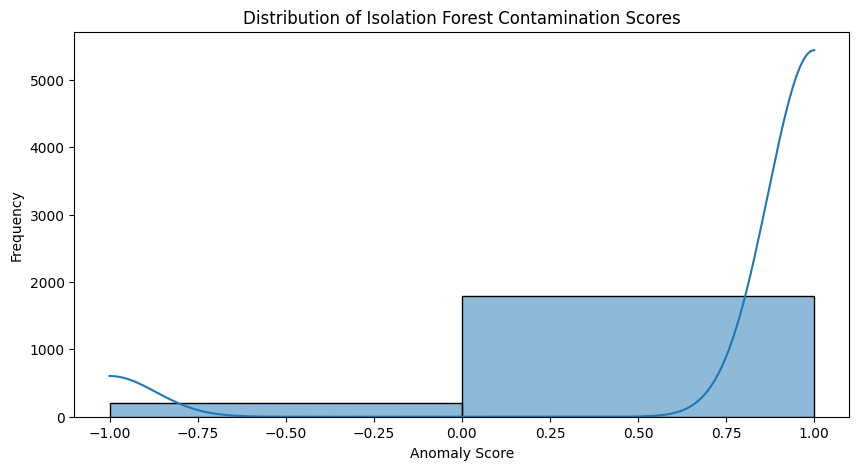

In [25]:
# Distribution of Contamination Levels
plt.figure(figsize=(10, 5))
sns.histplot(df_scaled['Contamination_Level_KMeans'], bins=3, kde=True)
plt.title("Distribution of KMeans Contamination Levels")
plt.xlabel("Cluster ID")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_scaled['Contamination_Level_DBSCAN'], bins=3, kde=True)
plt.title("Distribution of DBSCAN Contamination Levels")
plt.xlabel("Cluster ID")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_scaled['Contamination_Level_Agglo'], bins=3, kde=True)
plt.title("Distribution of Agglomerative Contamination Levels")
plt.xlabel("Cluster ID")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_scaled['Contamination_Score_IF'], bins=2, kde=True)
plt.title("Distribution of Isolation Forest Contamination Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()
